This part of the notebook is devoted to the analysis of Bayesian optimization of  function 
$$\mathbf{y} = sin (x) * (1 + |x|) $$  I consider Bayesian optimization for two cases: optimizing the function without noise and optimizing the same function, but with noise that depends quadratically from the coordinate. And then I compare the results.

In [17]:
%pylab inline  
import GPy
import GPyOpt
import numpy as np
import  Functions
from Functions import *

Populating the interactive namespace from numpy and matplotlib


In [24]:
def f_with_noise(X):
     # target function  + heteroscadastic noise
    return np.sin (X) * (1 + np.abs (X)) + \
        0.5 * np.random.multivariate_normal(np.zeros(X.reshape(-1, ).shape[0]), np.diag(abs (X.reshape (-1, ))**2), 1)[0]

def f_without_noise(X):
    return np.sin (X) * (1 + np.abs (X))

draw these functions

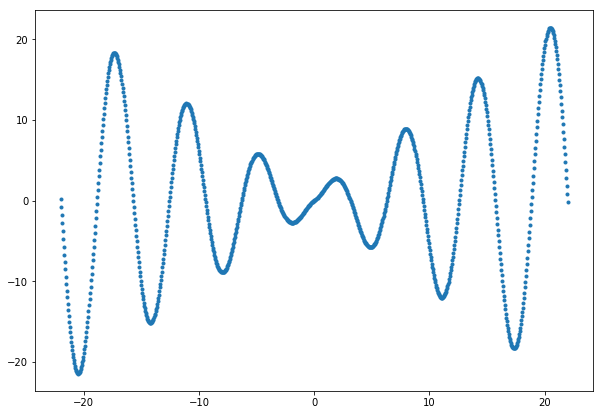

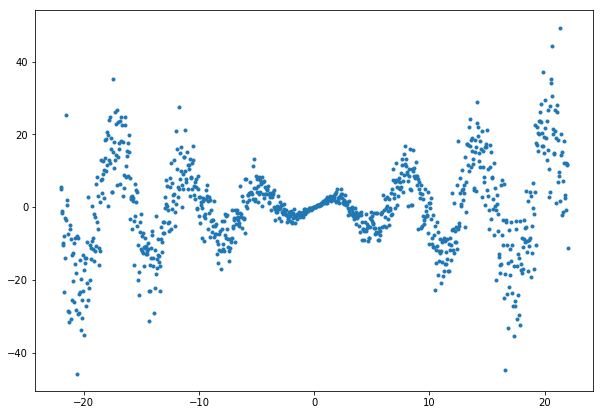

In [25]:
N = 1000
X = np.linspace(-22, 22, N)

y = f_without_noise(X) 
pyplot.figure(figsize = (10, 7))
pyplot.plot(X, y, '.')

y = f_with_noise(X) 
pyplot.figure(figsize = (10, 7))
pyplot.plot(X, y, '.')


Start optimization

In [100]:
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-22, 22)}]  # problem constraints 


#these constants are responsible for the number of iterations of the optimization algorithm
max_iter_for_func = 15 
max_iter_for_noise_func = 30


max_time = 120   # time budget 
eps      = 10e-6  # Minimum allows distance between the las two observations


iter = 30

# four arrays for storing optimal values
x_opt_without_noise = np.array([])
x_opt_with_noise = np.array([])

y_opt_without_noise = np.array([])
y_opt_with_noise = np.array([])

iter = 30
for i in range(iter):
    bayes_opt_without_noise = GPyOpt.methods.BayesianOptimization(f = f_without_noise,# function to optimize       
                                                domain = bounds, # box-constraints of the problem
                                                acquisition_type = 'EI',
                                                 exact_feval = True) # Selects the Expected improvement

    bayes_opt_without_noise.run_optimization(max_iter_for_func, max_time, eps)     
    
    x_opt_without_noise = np.append (x_opt_without_noise, bayes_opt_without_noise.x_opt)
    y_opt_without_noise = np.append (y_opt_without_noise, bayes_opt_without_noise.fx_opt)
    
    
    
    bayes_opt_with_noise = GPyOpt.methods.BayesianOptimization(f=f_with_noise,# function to optimize       
                                                domain=bounds, # box-constraints of the problem
                                                acquisition_type='EI',
                                                 exact_feval = True) # Selects the Expected improvement

    bayes_opt_with_noise.run_optimization(max_iter_for_noise_func, max_time, eps) 
    
    x_opt_with_noise = np.append (x_opt_with_noise, bayes_opt_with_noise.x_opt)
    y_opt_with_noise = np.append (y_opt_with_noise, bayes_opt_with_noise.fx_opt)
    
    


print 'x_opt_without_noise:\n', x_opt_without_noise, '\n'
print 'y_opt_without_noise:\n', y_opt_without_noise, '\n'

print 'x_opt_with_noise:\n', x_opt_with_noise, '\n'
print 'y_opt_with_noise:\n', y_opt_with_noise, '\n'


print "average x without noise = ", x_opt_without_noise.mean()
print "average x with noise = ", x_opt_with_noise.mean()
print "diff = ", np.abs (x_opt_without_noise.mean() - x_opt_with_noise.mean()), "\n"


print "average y without noise = ", y_opt_without_noise.mean()
print "average y with noise = ", y_opt_with_noise.mean()
print "diff = ", np.abs (y_opt_without_noise.mean() - y_opt_with_noise.mean()), "\n"
    
print "median x without noise = ", np.median (x_opt_without_noise)
print "median x with noise = ", np.median (x_opt_with_noise)
print "diff = ", np.abs (np.median (x_opt_without_noise) - np.median (x_opt_with_noise)), "\n"


print "median y without noise = ", np.median (y_opt_without_noise)
print "median y with noise = ", np.median (y_opt_with_noise)
print "diff = ", np.abs (np.median (y_opt_without_noise) - np.median (y_opt_with_noise)), "\n"
    

x_opt_without_noise:
[-20.44964634  17.3046091  -20.51711758 -20.44207627  16.86463634
 -20.46036628 -20.40950102 -20.42654008  17.3344982   17.37843943
 -20.40496329 -20.24444705 -14.22463567  17.29873834 -14.40751733
  17.36208764 -20.52737107  17.3707721   17.36061675 -14.16640363
 -20.4664594  -14.20707606 -20.16437681  17.409615   -20.47550975
  17.27917528  17.3349952  -14.2012296  -20.45752906  16.75609875] 

y_opt_without_noise:
[-21.44044356 -18.2984939  -21.41645808 -21.43701686 -16.35452903
 -21.44318823 -21.40824056 -21.42612988 -18.30602484 -18.28721028
 -21.40242878 -20.91661409 -15.16643263 -18.29508649 -14.8478759
 -18.29837536 -21.40421189 -18.29306071 -18.29913757 -15.15992209
 -21.443646   -15.16993054 -20.47477338 -18.2522246  -21.44285002
 -18.2791737  -18.30601115 -15.17004716 -21.44270238 -15.38555279] 

x_opt_with_noise:
[ -7.87304785 -20.04339993  -7.79315897  17.99603021  17.89786462
  10.48333198  16.76459339  17.8943847  -14.83297466  10.6296494
  17.0580007

This function has two global minimums (-20.4, -21.4) and  (17.2, -18.2). This block analyzes how many times these minimums were found for a function without noise and function with noise

In [102]:
count_opt_without_noise = 0
count_opt_with_noise = 0

real_first_opt_without_noise = np.array ([])
real_first_opt_with_noise = np.array ([])
real_second_opt_without_noise = np.array ([])
real_second_opt_with_noise = np.array ([])

for i in range (iter):
    if (x_opt_without_noise[i] < -19.):
        real_first_opt_without_noise = np.append (real_first_opt_without_noise, x_opt_without_noise[i])
        count_opt_without_noise += 1
    if (16. < x_opt_without_noise[i] < 19.):
        real_second_opt_without_noise = np.append (real_second_opt_without_noise, x_opt_without_noise[i])
        count_opt_without_noise += 1
    
    if (x_opt_with_noise[i] < -19.):
        real_first_opt_with_noise = np.append (real_first_opt_with_noise, x_opt_with_noise[i])
        count_opt_with_noise += 1
    if (16. < x_opt_with_noise[i] < 19.):
        real_second_opt_with_noise = np.append (real_second_opt_with_noise, x_opt_with_noise[i])
        count_opt_with_noise += 1
    
print 'num opt without noise = ', count_opt_without_noise
print 'num opt with noise = ', count_opt_with_noise

num opt without noise =  25
num opt with noise =  16


In [103]:
print 'real_first_opt_without_noise:'
print real_first_opt_without_noise
print "size = ", real_first_opt_without_noise.shape[0]
print "mean = ", real_first_opt_without_noise.mean(), ", variance = ", real_first_opt_without_noise.var()
print '\n'

print 'real_first_opt_with_noise:'
print real_first_opt_with_noise
print "size = ", real_first_opt_with_noise.shape[0]
print "mean = ", real_first_opt_with_noise.mean(), ", variance = ", real_first_opt_with_noise.var()
print '\n'

print 'real_second_opt_without_noise:'
print real_second_opt_without_noise
print "size = ", real_second_opt_without_noise.shape[0]
print "mean = ", real_second_opt_without_noise.mean(), ", variance = ", real_second_opt_without_noise.var()
print '\n'

print 'real_second_opt_with_noise:'
print real_second_opt_with_noise
print "size = ", real_second_opt_with_noise.shape[0]
print "mean = ", real_second_opt_with_noise.mean(), ", variance = ", real_second_opt_with_noise.var()

real_first_opt_without_noise:
[-20.44964634 -20.51711758 -20.44207627 -20.46036628 -20.40950102
 -20.42654008 -20.40496329 -20.24444705 -20.52737107 -20.4664594
 -20.16437681 -20.47550975 -20.45752906]
size =  13
mean =  -20.418915692712673 , variance =  0.009779244972573322


real_first_opt_with_noise:
[-20.04339993 -21.18229388 -19.89251637 -20.74490703]
size =  4
mean =  -20.4657793033441 , variance =  0.2745850385256356


real_second_opt_without_noise:
[17.3046091  16.86463634 17.3344982  17.37843943 17.29873834 17.36208764
 17.3707721  17.36061675 17.409615   17.27917528 17.3349952  16.75609875]
size =  12
mean =  17.2545235095874 , variance =  0.0411775165607664


real_second_opt_with_noise:
[17.99603021 17.89786462 16.76459339 17.8943847  17.05800074 17.91981251
 17.47793446 17.36120412 17.54975163 18.21963843 16.98182789 17.74057158]
size =  12
mean =  17.571801189791184 , variance =  0.1897440195632968


    
    =========================================================================================================================  
    this statistics was when 
    max_iter_for_func = 15 
    max_iter_for_noise_func = 30


    real_first_opt_without_noise:
    [-20.56456284 -20.55257141 -20.5419878  -20.52640485 -20.51550773
     -20.50905795 -20.47436942 -20.45705699 -20.45513509 -20.45324262
     -20.42739094 -20.4255331  -20.41186693 -20.37923456]
    size =  14
    mean =  -20.478137302346973 , variance =  0.0030637444903974303

    
    real_first_opt_with_noise:
    [-21.70508461 -21.55192141 -20.63342525 -20.25547593 -20.24440141
     -20.0788122  -19.842322   -19.78773888 -19.70208654]
    size =  9
    mean =  -20.422363136846837 , variance =  0.48904072031144824
    

    real_second_opt_without_noise:
    [17.15767724 17.25937015 17.29720933 17.30194196 17.30685573 17.32447898
     17.35592653 17.35599588 17.36062222 17.37845059 17.39705006 17.4059443 ]
    size =  12
    mean =  17.325126914435426 , variance =  0.004310313513546138


    real_second_opt_with_noise:
    [16.69048383 17.00921559 17.07200224 17.07729348 17.24825958 17.41641125
     17.45169066 17.64256909 17.69884905 17.9408958  18.11899594]
    size =  11
    mean =  17.39696968443707 , variance =  0.16830791111889515



    =========================================================================================================================    
    this statistics was when 
    max_iter_for_func = 15 
    max_iter_for_noise_func = 15
    real_first_opt_without_noise:
    [-20.4057881  -20.48694105 -20.47587801 -19.76594068 -20.42356648
     -20.53280178 -20.47199549 -20.49338072 -20.46333184 -20.3834365
     -20.462336   -20.39661228 -20.47806088 -20.51073413 -20.48550883
     -20.5566816  -20.4841104  -20.49159843]
    size =  18
    mean =  -20.431594620977595 , variance =  0.027965098622553072
    
    
    real_first_opt_with_noise:
    [-19.65721812 -20.80072876 -19.38051884 -20.83715657 -19.98614952
     -20.69216465 -19.00062902 -21.6376857  -19.75637517]
    size =  9
    mean =  -20.19429181617117 , variance =  0.63587820365499
    
    
    real_second_opt_without_noise:
    [17.37014884 17.36813619 17.31920903 17.42533224 17.4008789  17.26708339
     17.2741461  17.25106002 17.26303873 17.28117897]
    size =  10
    mean =  17.3220212418904 , variance =  0.0036835174994610566
    
    
    real_second_opt_with_noise:
    [17.02806367 17.07914067 17.86902755 17.44910654 17.57918658]
    size =  5
    mean =  17.4009049985804 , variance =  0.09915787431935871
        

    =========================================================================================================================    
    this statistics was when 
    max_iter_for_func = 15 
    max_iter_for_noise_func = 45
    
    
    real_first_opt_without_noise:
    [-20.36647583 -20.3929331  -20.44438997 -20.44085328 -20.36933895
     -20.47693576 -20.55177067 -20.43025806 -20.47499706 -20.41804421
     -20.42841473 -20.00670172 -20.43717574 -20.46122643]
    size =  14
    mean =  -20.407108252214737 , variance =  0.01439191328658063
    
    
    real_first_opt_with_noise:
    [-20.08671644 -20.36869035 -21.07522727 -20.46765977 -19.60420483
     -20.13378561 -19.74801213 -21.20914047 -20.38425409 -20.95971046
     -19.54508609]
    size =  11
    mean =  -20.325680682269766 , variance =  0.3024761544854415
    
    
    real_second_opt_without_noise:
    [17.28166258 17.23658522 17.38579813 17.30994247 17.33385067 17.31909646
     17.27006427 17.35852901 17.33320168]
    size =  9
    mean =  17.314303390031043 , variance =  0.0018790303820351692
    
    
    real_second_opt_with_noise:
    [17.05384122 17.81409125 17.29472439 17.89285665 17.39774585 18.1472129
     17.84280268 17.18468817]
    size =  8
    mean =  17.578495388108692 , variance =  0.1363961075528734
    